<a href="https://colab.research.google.com/github/dollatrahul/Heart-Disease-Prediction/blob/main/HeartDiseasePredictionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/heart.csv")

In [ ]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
df.describe(include="all")

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


In [ ]:
df.isnull().sum()


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns
import numpy as np




(array([410.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 508.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

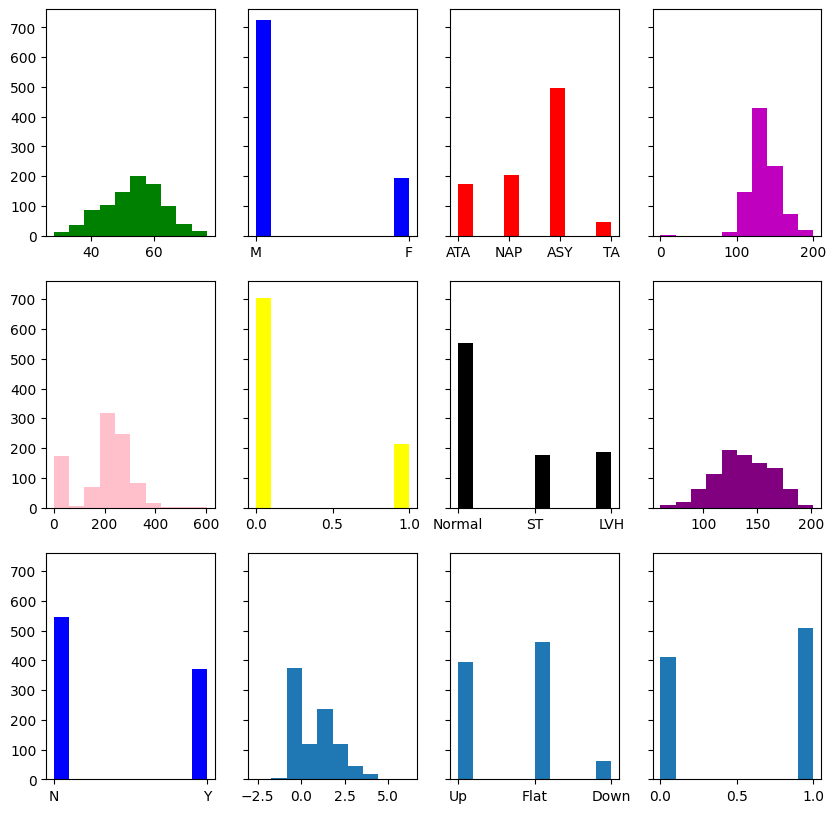

In [ ]:
fig, axs = plt.subplots(3,4, figsize=(10, 10), sharey=True)
axs[0][0].hist(df['Age'],color='g')
axs[0][1].hist(df['Sex'],color='b')
axs[0][2].hist(df['ChestPainType'],color='r')
axs[0][3].hist(df['RestingBP'],color='m')
axs[1][0].hist(df['Cholesterol'],color='pink')
axs[1][1].hist(df['FastingBS'],color='yellow')
axs[1][2].hist(df['RestingECG'],color='black')
axs[1][3].hist(df['MaxHR'],color='purple')
axs[2][0].hist(df['ExerciseAngina'],color='blue')
axs[2][1].hist(df['Oldpeak'])
axs[2][2].hist(df['ST_Slope'])
axs[2][3].hist(df['HeartDisease'])


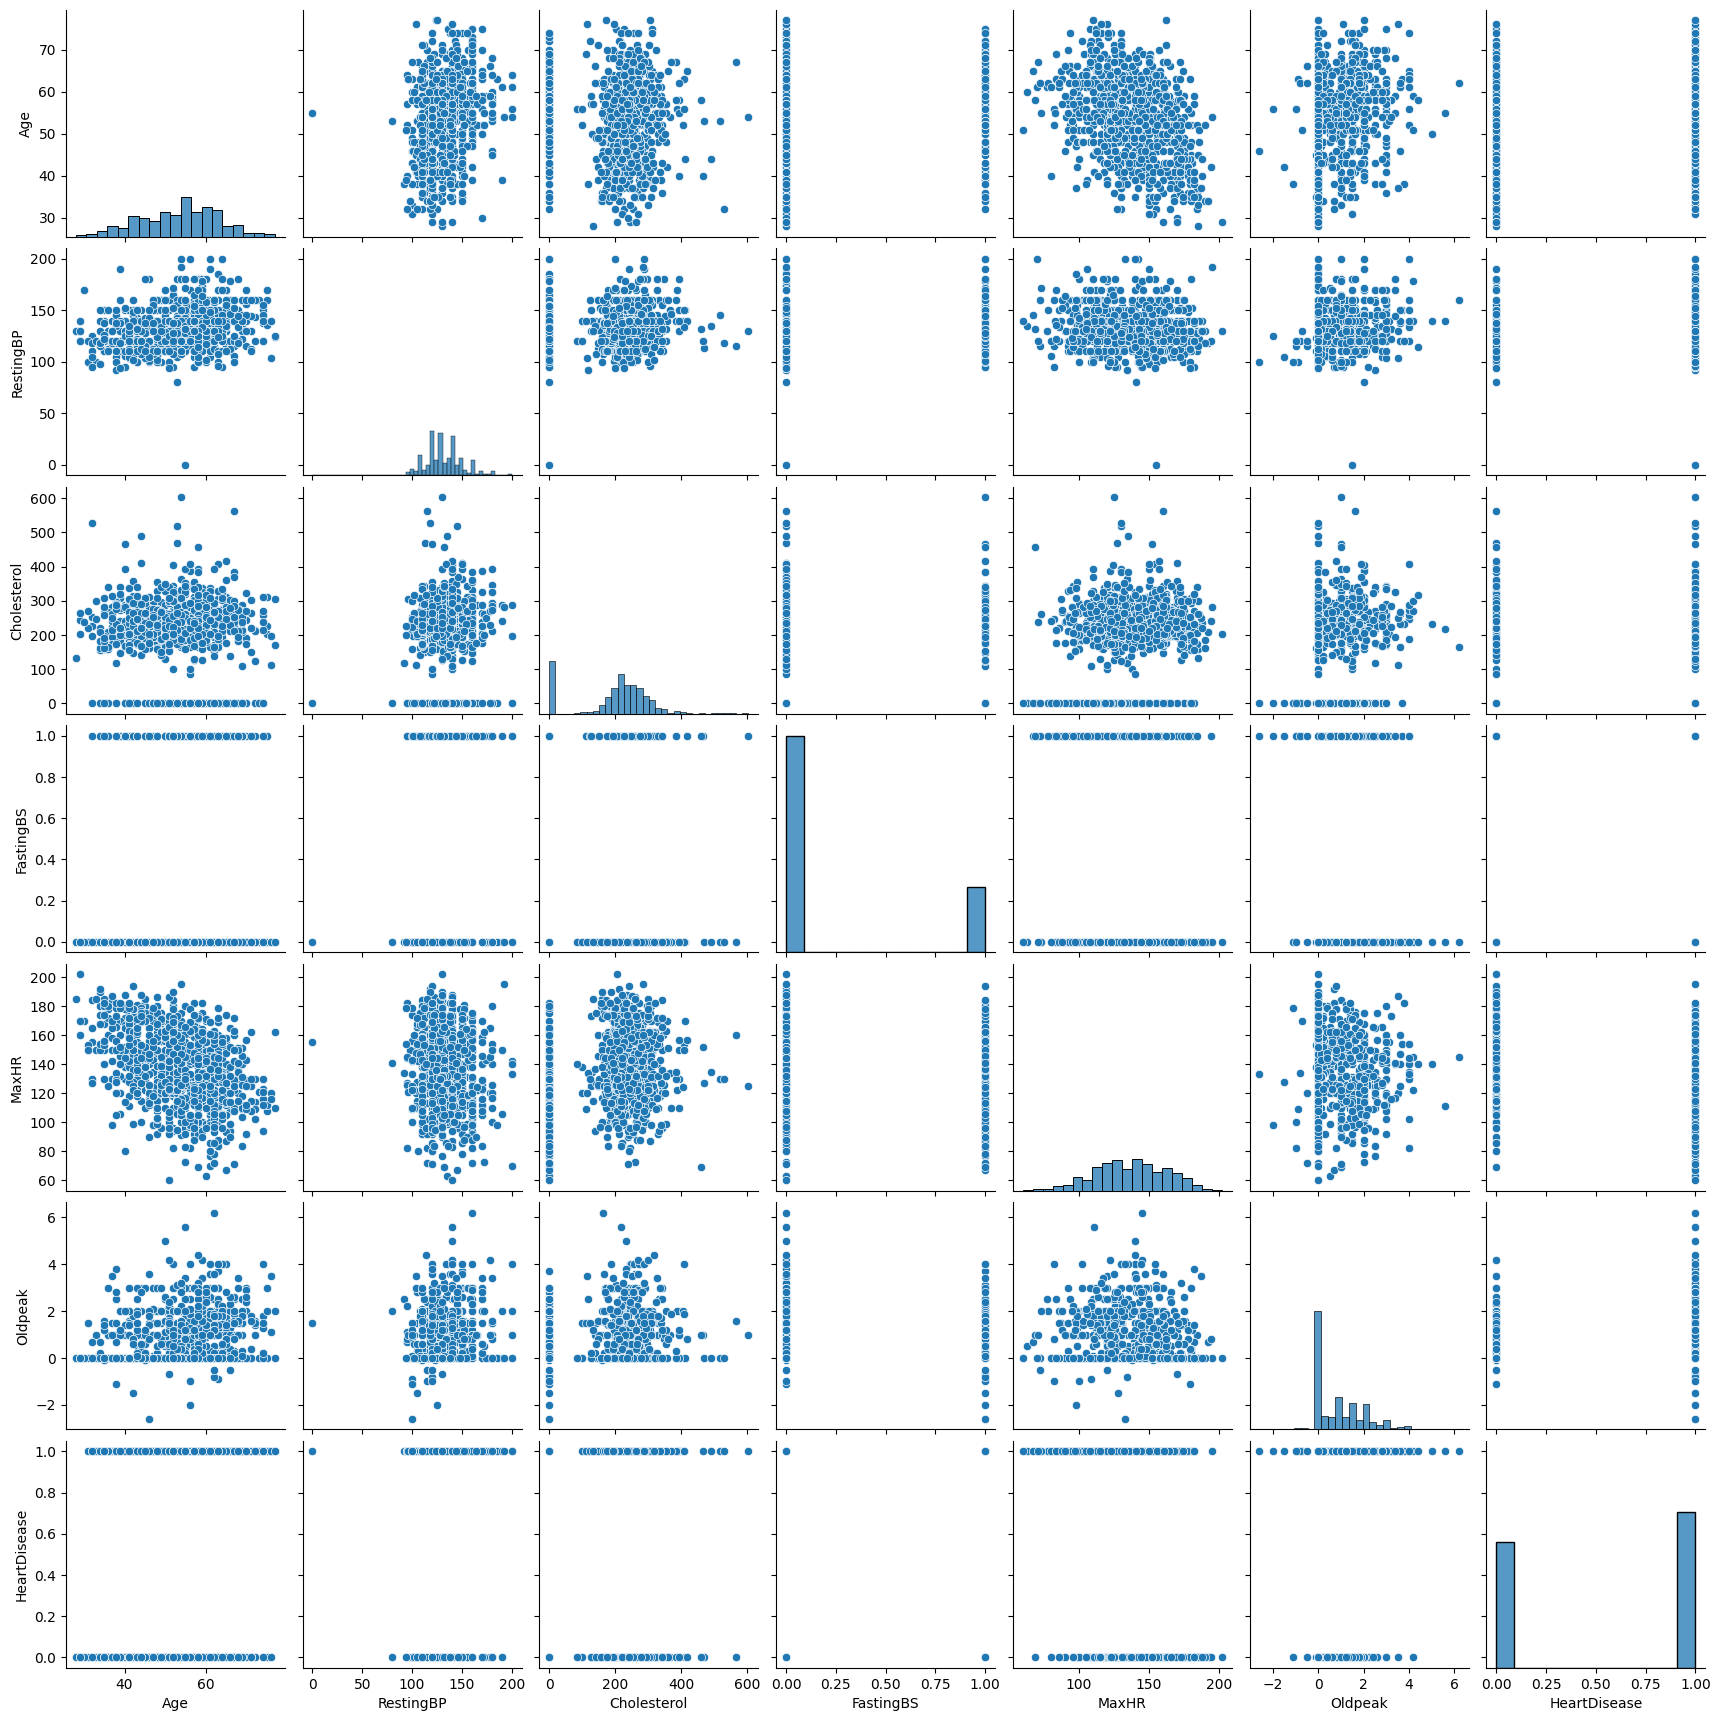

In [ ]:
sns.pairplot(df,hue=None,height=2.5)

In [ ]:
from scipy import stats


{'whiskers': [<matplotlib.lines.Line2D at 0x7f4204284a00>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4204284f40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f4204284760>],
 'medians': [<matplotlib.lines.Line2D at 0x7f4204285480>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f4204285720>],
 'means': []}

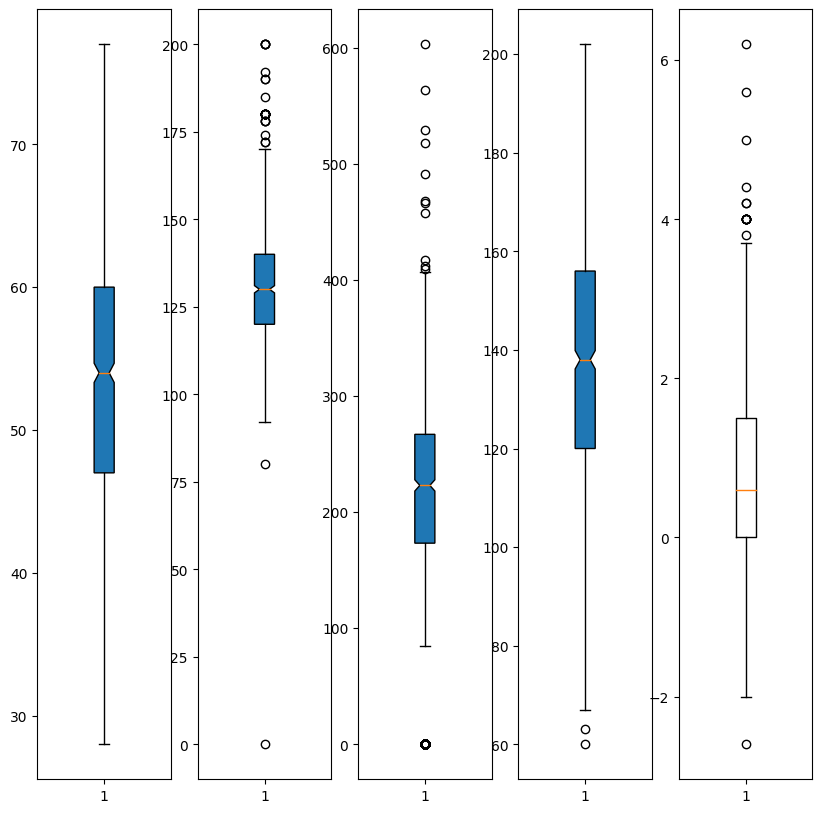

In [ ]:
fig,axs=plt.subplots(1,5,figsize=(10,10))
axs[0].boxplot(df['Age'],patch_artist=True,notch=True)
axs[1].boxplot(df['RestingBP'],patch_artist=True,notch=True)
axs[2].boxplot(df['Cholesterol'],patch_artist=True,notch=True)
axs[3].boxplot(df['MaxHR'],patch_artist=True,notch=True)
axs[4].boxplot(df['Oldpeak'])

<h1> Outlier Detection by IQR method </h1>
<p><ul><li><p> IQR stands for interquartile Range and defined as the difference between third quartile and first quartile </p></li>
<ol><li>Any value which is falling in the fence of q1-1.5*(IQR) and 1.5*(IQR)+q3 are not considered as outliers.


# for the Age attribute let's define the iqr and findout what is the ceiling

In [ ]:
age=list(df['Age'])
age.sort()


In [ ]:
a1=len(age)/4
q1=age[int(a1)-1]
q1

47

In [ ]:
q2=age[len(age)//2-1]
q2




54

In [ ]:
q3=age[3*len(age)//4-1]
q3


60

In [ ]:
q4=age[len(age)-1]
q4



77

<h1> Defining IQR </h1>

In [ ]:
IQR=q3-q1
IQR

13

In [ ]:
upper_ceiling=1.5*IQR+q3
lower_ceiling=q1-1.5*IQR

In [ ]:
tol_level=(upper_ceiling,lower_ceiling)
tol_level

(79.5, 27.5)

#### Accessing the dataframe's age column and filtering the condition

In [ ]:
df_1=pd.DataFrame(age)
df_1.rename(columns={0:'Age'},inplace=True)


In [ ]:
## Outliers for the data is filtered out
df_1=(df_1[df_1['Age']>27.5] & df_1[df_1['Age']<79.5])



In [ ]:
### For the RestingBP column again repeating the same process and trying to calculate different statstical measures

In [ ]:
resting_bp=list(df['RestingBP'])
resting_bp.sort()


resting_bp_=resting_bp[len(resting_bp)//4-1]

In [ ]:
q2_resting_bp=resting_bp[len(resting_bp)//2-1]
q2_resting_bp


130

In [ ]:
q3_resting_bp=resting_bp[3*len(resting_bp)//4-1]
q3_resting_bp

140

In [ ]:
q4_resting_bp=resting_bp[len(resting_bp)-1]
q4_resting_bp

200

<h1> Defining again IQR for the resting BP column </h1>


In [ ]:
IQR_=q3_resting_bp-resting_bp_
IQR_

20

In [ ]:
upper_ceiling_=1.5*IQR_+q3_resting_bp
lower_ceiling_=-(1.5*IQR_ -resting_bp_)
tol_level_=(upper_ceiling_,lower_ceiling_)
tol_level_

(170.0, 90.0)

In [ ]:
df2=pd.DataFrame(resting_bp)
df2=df2.rename(columns={0:'RestingBP'})




<h1> Before Building Model</h1>
<h2>We have to understand few things here</h2>
  The Categorical variables must be taken into account
  The categorical variables can be transformed by encoding method for model implementation     


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


<div><p><h3> Name of the categorical variable </h3>
    <ol><li>Sex</li>
    <li>ChestPainType</li>
    <li>RestingECG</li>
    <li>ExcerciseAngina</li>
    <li>ST_Slope</li>
    </ol>
    </div>
    
 <div><h3> I am going to write a function of one hot encoding which will assign the values of the different <br>
    categorical variable into different values</h3>
    </div>
    
        

In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
li=list(df.columns)
lis_=[]
s=set()
for items in li:
  lis_.append(df[items])

In [ ]:
one_hot_encoded_data = pd.get_dummies(df, columns = ['Sex', 'ChestPainType','RestingECG','ExerciseAngina','ST_Slope'])
one_hot_encoded_data=one_hot_encoded_data.drop(columns=['Sex_F'],axis=1)
one_hot_encoded_data=one_hot_encoded_data.rename(columns={'Sex_M':'sex'})
df1=one_hot_encoded_data



<h1 style='bold'><i> Using Scaling for the given data</i> </h1>
<div><p>We can clearly observe the most of the data are having range from 0 to 1 but features Age,RestingBP,Cholesterol and MaxHR are containing values which are not in scale, when we try to implement some model here then the value containing larger value may be treated more important and our model may not perform very well in this case </p>
</div>
<div><b> There are two types of method by which data can be scaled </b></br>
<ul> <li> 1.Normalization </li>
     <li> 2. Standardization </li>
     </ul>
<div><b>Normalization: Rescaling of data in range from 0 to 1.</b></br>
<p> There are various methods for the normalization process </p>
<ol><li>MinMaxScaling:</br>
<p>Xsc=X−XminXmax−Xmin</p>

<li>Standardization:Making Gaussian Distributed data such that the mean is 0 and variance is 1. </br>
<p> x_std=(x-mu)/sigma</p>
</li>
        
     

</div>




In [ ]:
age=list(one_hot_encoded_data['Age'])

def mean(a):

  sum=0
  count=0
  for i in range(len(a)):
    sum=sum+a[i]
    count=count+1

  mean=sum/count
  return mean

def variance(a):
  sum=0
  count=0
  for i in range(len(a)):
   sum+=(a[i]-mean(a))**2
   count=count+1
  variance=sum/(count-1)
  return variance
 
def sqrt(x):
  return x**1/2
#Standard Scaler applied to Age 
X_dy=(one_hot_encoded_data['Age']-mean(age))/sqrt(variance(age))
one_hot_encoded_data['Age']=X_dy
# Standard scaler to RestingBP

restingBP=list(one_hot_encoded_data['RestingBP'])
Y_dy=(one_hot_encoded_data['RestingBP']-mean(restingBP))/sqrt(variance(restingBP))
one_hot_encoded_data['RestingBP']=Y_dy

#Standard Scaling to Cholesterol data
cholesterol=list(one_hot_encoded_data['Cholesterol'])
Z_dy=(one_hot_encoded_data['Cholesterol']-mean(cholesterol))/sqrt(variance(cholesterol))
one_hot_encoded_data['Cholesterol']=Z_dy

#Standard Scaling to MaxHR
maxhr=list(one_hot_encoded_data['MaxHR'])
ZZ=(one_hot_encoded_data['MaxHR']-mean(maxhr))/sqrt(variance(maxhr))
one_hot_encoded_data['MaxHR']=ZZ
#ZZ=(one_hot_encoded_data['MaxHR']-mean(maxhr))/sqrt(variance(maxhr))
#one_hot_encoded_data['Cholesterol']=ZZ

one_hot_encoded_data
















,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,sex,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-0.303703,0.044364,0.015078,0,0.108575,0.0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,-0.101398,0.161059,-0.003142,0,0.059209,1.0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,-0.371139,-0.013983,0.014075,0,-0.119740,0.0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,-0.123876,0.032695,0.002541,0,-0.088886,1.5,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,0.010994,0.102712,-0.000635,0,-0.045692,0.0,0,1,0,0,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.191311,-0.130678,0.010899,0,-0.014838,1.2,1,1,0,0,0,1,0,1,0,1,0,0,1,0
914,0.325692,0.067703,-0.000969,1,0.012929,3.4,1,1,1,0,0,0,0,1,0,1,0,0,1,0
915,0.078430,-0.013983,-0.011333,0,-0.067289,1.2,1,1,1,0,0,0,0,1,0,0,1,0,1,0
916,0.078430,-0.013983,0.006218,0,0.114745,0.0,1,0,0,1,0,0,1,0,0,1,0,0,1,0


<Axes: >

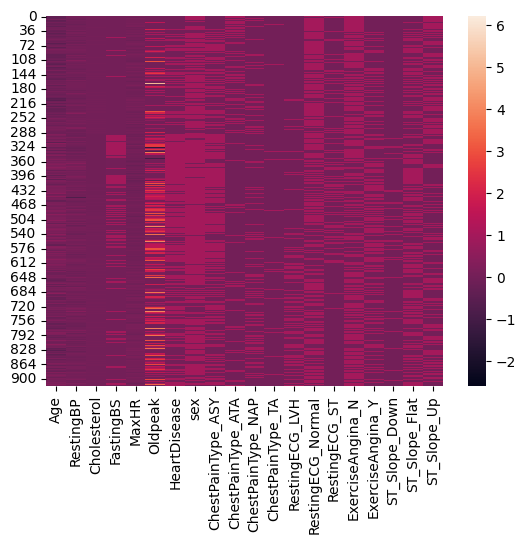

In [ ]:
sns.heatmap(one_hot_encoded_data)

In [ ]:
from sklearn.model_selection import train_test_split
X_data=one_hot_encoded_data.drop('HeartDisease',axis=1)
Y_data=one_hot_encoded_data['HeartDisease']

X_train,X_test,y_train,y_test=train_test_split(X_data,Y_data,test_size=0.2,random_state=1)






<h1><b size=10px>Now Dataset is prepared for the evaluation <b></h1>
<h1><b> Model Selection </b></h1>
<div> Model Selection is a process by which we select a model and apply the model to the prepared dataset. After applying the model we evaluate different metric for model accuracy. </div>
<div> Since from problem set it is clear, the given problem is a classification problem so we use different classifier and evaluate its performance one by one </div>
<div> We are going to start with decision tree classifier </div>



In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
arr=dt.predict(X_test)
arr=arr.reshape(-1,1)


array1=dt.predict(X_train)
accuracy_score(y_train,array1)*100








100.0

|--- feature_18 <= 0.50
|   |--- feature_4 <= 0.04
|   |   |--- feature_6 <= 0.50
|   |   |   |--- feature_1 <= 0.01
|   |   |   |   |--- feature_15 <= 0.50
|   |   |   |   |   |--- feature_4 <= 0.03
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_4 >  0.03
|   |   |   |   |   |   |--- feature_2 <= 0.01
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_2 >  0.01
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_15 >  0.50
|   |   |   |   |   |--- feature_2 <= 0.01
|   |   |   |   |   |   |--- feature_1 <= -0.02
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_1 >  -0.02
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_2 >  0.01
|   |   |   |   |   |   |--- feature_4 <= -0.10
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_4 >  -0.10
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  0.01
|   |   |   |   |---

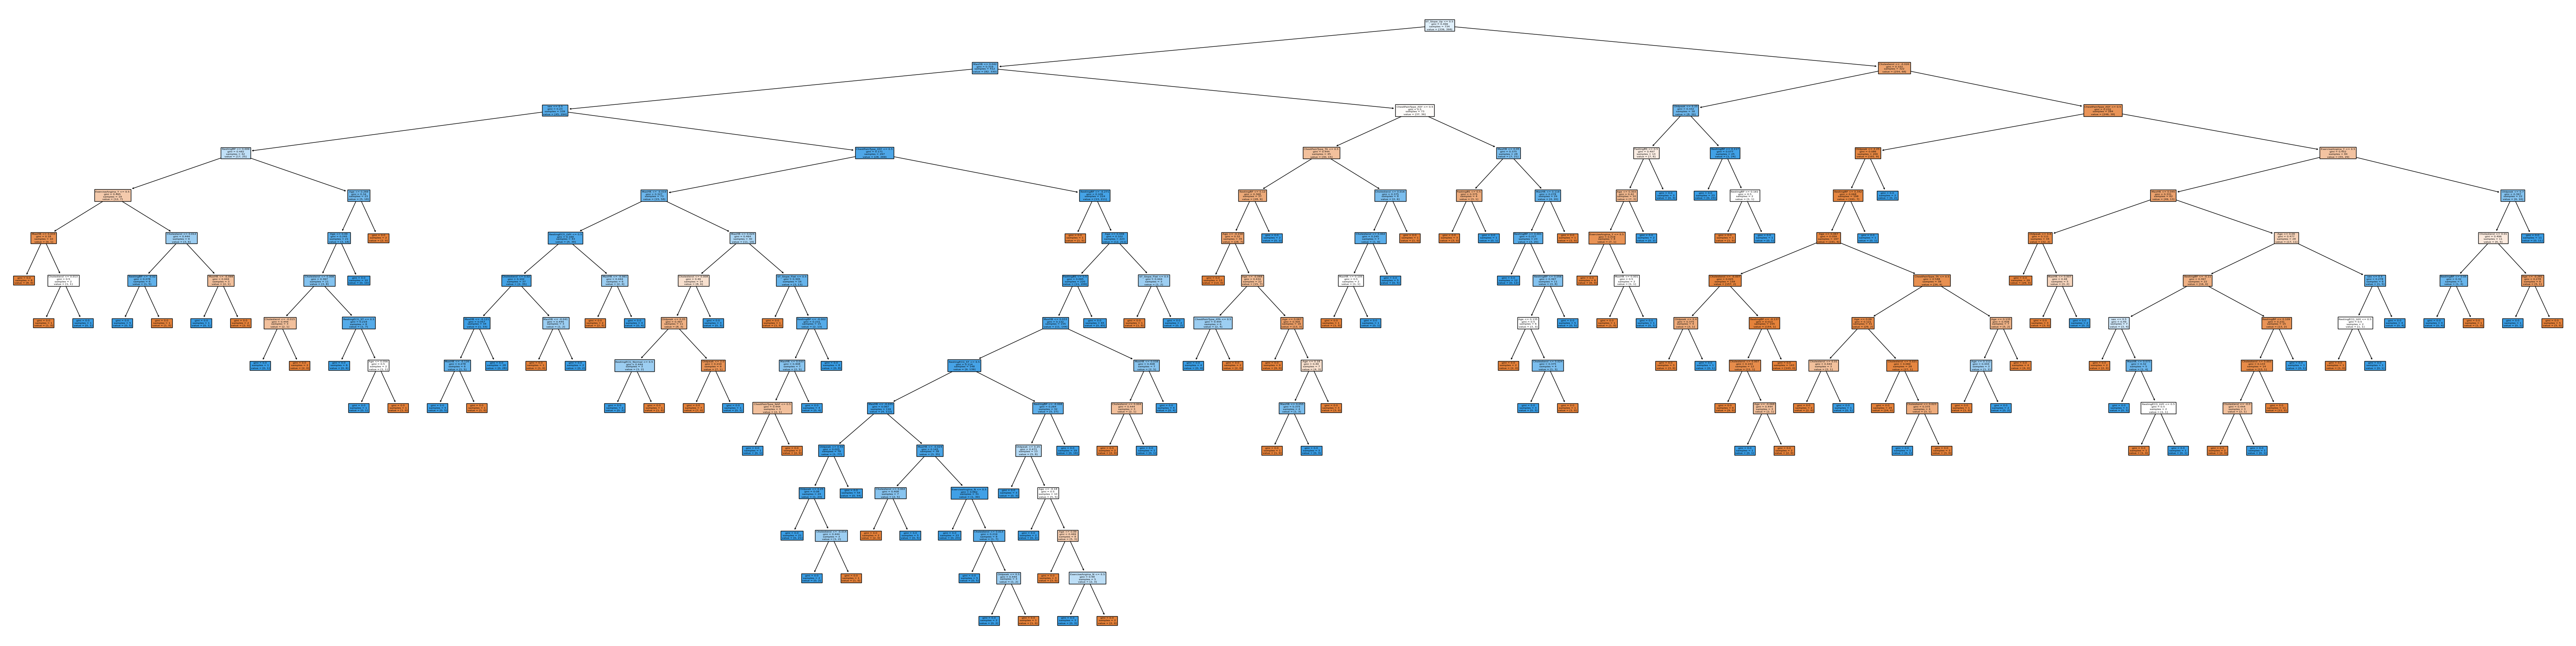

In [ ]:
from sklearn.tree import plot_tree, export_text
text_representation = tree.export_text(dt)
print(text_representation)

plt.figure(figsize =(80,20))

plot_tree(dt, feature_names=X_train.columns, filled=True);




0.7717391304347826


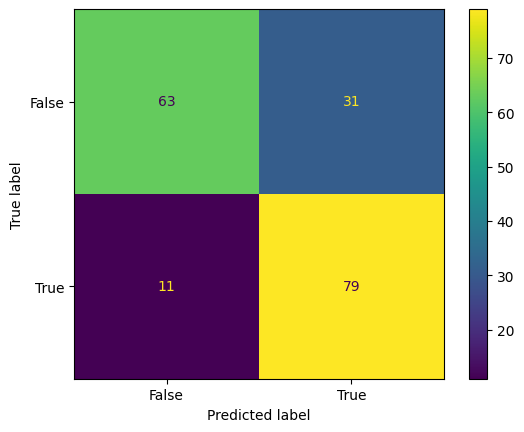

In [ ]:
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics




print(accuracy_score(arr,y_test))
model1=confusion_matrix(arr,y_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = model1, display_labels = [False, True])
cm_display.plot()
plt.show()




<h1><b>Some Conclusions from the model </b> </h1>
<h2>Model accuracy is 81% percent but in terms of reducing type-1 error model is performing better than type-2 error </h2>


In [ ]:
#Finding Precision,recall and F-measure for the given model
tp=model1[1,1]
tn=model1[0,0]
fp=model1[0,1]
fn=model1[1,0]
precision=tp/(tp+fp)
recall=tp/(tp+fn)

F1=(1/precision)+(1/recall)
accuracy=tp+tn/(tp+tn+fp+fn)

print("The performance of the model is given by precision,recall,F1,accuracy",precision,recall,F1,accuracy)

The performance of the model is given by precision,recall,F1,accuracy 0.7181818181818181 0.8777777777777778 2.5316455696202533 79.34239130434783


<h1><b> ROC and AUC</b> </h1>
<div><ul><li> ROC:Receiver operating characteristic curve </li>
         <div> This shows performance of a classification models at all classification thresholds this method is used in logistic regression </div>
         <div> This is obtained by plotting 
              <ol><li>TPR: True Positive Rate</li>
              <ul><li>TPR= TP/TP+FN </li>
                  <li> FPR=FP/FP+TN </li>
                  </ul>
          </div>
          
       


            

In [ ]:
#TPR=recall
#FPR=fp/(fp+tn)
#%matplotlib inline
#plt.plot(TPR,FPR)
#plt.show()


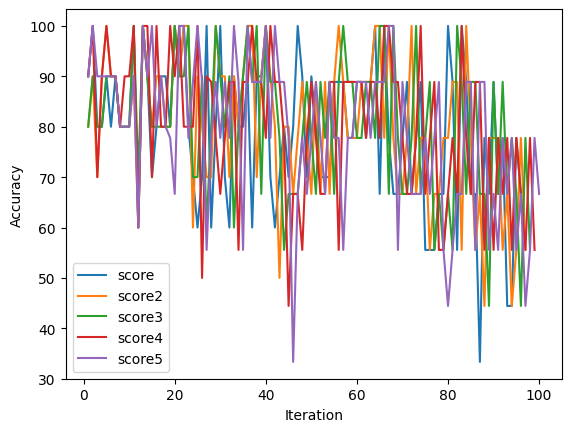

In [ ]:
#using different cross-validation methods for checking model performance

from sklearn.model_selection import cross_val_score
score=cross_val_score(dt,X_data,Y_data,cv=96)
score2=cross_val_score(dt,X_data,Y_data,cv=97)
score3=cross_val_score(dt,X_data,Y_data,cv=98)
score4=cross_val_score(dt,X_data,Y_data,cv=99)
score5=cross_val_score(dt,X_data,Y_data,cv=100)
score=score*100
score2=score2*100
score3=score3*100
score4=score4*100
score5=score5*100
plt.plot(range(1,97),score)
plt.plot(range(1,98),score2)
plt.plot(range(1,99),score3)
plt.plot(range(1,100),score4)
plt.plot(range(1,101),score5)
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.legend(labels=['score','score2','score3','score4','score5'])











In [ ]:
cv_iterations=[score,score2,score3,score4,score5]
for item in cv_iterations:
  print('The performance of the model at ',len(item),'iterations is given as ',mean(item))


The performance of the model at  96 iterations is given as  78.70370370370368
The performance of the model at  97 iterations is given as  80.27491408934702
The performance of the model at  98 iterations is given as  80.11337868480722
The performance of the model at  99 iterations is given as  80.30303030303024
The performance of the model at  100 iterations is given as  79.03333333333329


In [ ]:
#without using Standard scaler let us check the performance of the data 
df1
X1=df1.drop('HeartDisease',axis=1)
y1=df1['HeartDisease']

X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.2,random_state=0)
dt.fit(X1_train,y1_train)
array3=dt.predict(X1_train)
print(accuracy_score(array3,y1_train))
array2=dt.predict(X1_test)
accuracy_score(array2,y1_test)

1.0


0.7445652173913043

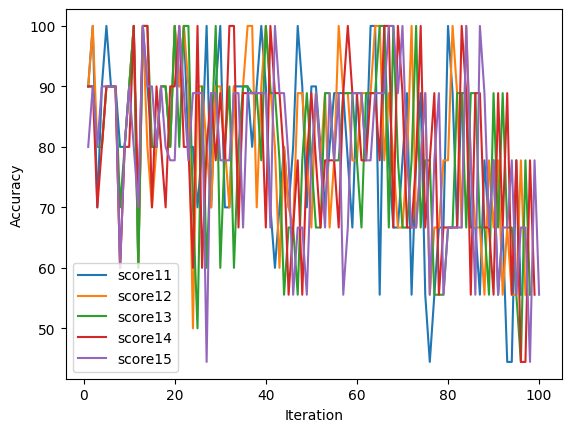

In [ ]:
score11=cross_val_score(dt,X1,y1,cv=96)
score12=cross_val_score(dt,X1,y1,cv=97)
score13=cross_val_score(dt,X1,y1,cv=98)
score14=cross_val_score(dt,X1,y1,cv=99)
score15=cross_val_score(dt,X1,y1,cv=100)
score11=score11*100
score12=score12*100
score13=score13*100
score14=score14*100
score15=score15*100
plt.plot(range(1,97),score11)
plt.plot(range(1,98),score12)
plt.plot(range(1,99),score13)
plt.plot(range(1,100),score14)
plt.plot(range(1,101),score15)
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.legend(labels=['score11','score12','score13','score14','score15'])

In [ ]:
cv_iterations2=[score11,score12,score13,score14,score15]
for item in cv_iterations2:
  print('The performance of the model at ',len(item),'iterations is given as ',mean(item))

The performance of the model at  96 iterations is given as  79.89583333333331
The performance of the model at  97 iterations is given as  80.54982817869411
The performance of the model at  98 iterations is given as  79.12698412698411
The performance of the model at  99 iterations is given as  79.64085297418626
The performance of the model at  100 iterations is given as  79.08888888888883


<h1><b>Tuning the parameter of the decision tree to check whether model performance is getting better or not.</b></h1>
<h2>There are so many parameters in Decision Tree Classifier lets Tune them and try to figure out model performance </h2>
<h3>One can se very clearly that the model performance on training data is 100 percent but in test data set it is 80 percent which shows case of overfitting so we must tune the parameter to avoid this overfitting using regularization techniques,in decision tree the hyperparameters are 
<p>The various parameter of decision tree classifier is given as </p>
<ol><li>Max_depth: The depth of decision tree may be set accordingly to avoid overfitting </li>
<li>min samples split : the minimum number of samples a node must have before it can be split.</li>
<li>min samples leaf : the minimum number of samples a leaf node must have</li>
<li>max leaf nodes : maximum number of leaf nodes</li>
<li>max features : maximum number of features that are evaluated for splitting at each node</li>



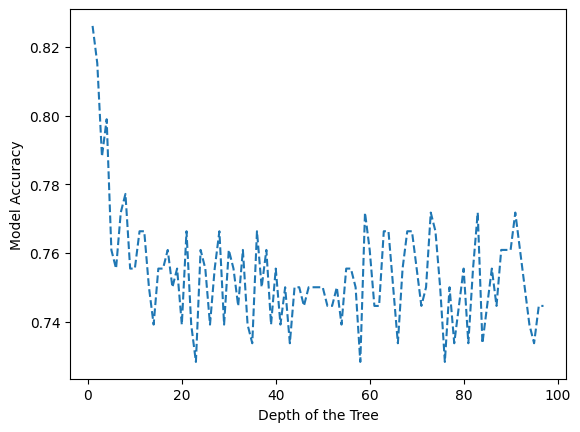

In [ ]:
### Tunning Hyperparameters of the decision tree
%matplotlib inline
var1=[]
for i in range(3,100):

  new_model=DecisionTreeClassifier(max_depth=i)
#### Creating model upto three depth
  new_model.fit(X1_train,y1_train)
  array_new=new_model.predict(X1_test)
  var1.append(accuracy_score(array_new,y1_test))
plt.figure()
plt.plot(range(1,len(var1)+1),var1,linestyle='dashed')
plt.ylabel("Model Accuracy")
plt.xlabel("Depth of the Tree")
plt.show()


<h1>Effect on Tunning the parameters </h1>
<p> When Depth of the tree is increased, the model's performance is improved but after depth 3 there is a sudden drop in the model's accuracy after that model started overfitting. </p>


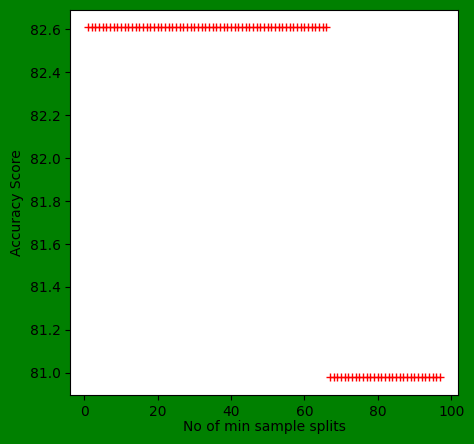

In [ ]:
#We may say three depth is performing very well
var2=[]
for i in range(3,100):
 new_model1=DecisionTreeClassifier(max_depth=3,min_samples_split=i)
 new_model1.fit(X1_train,y1_train)
 array33=new_model1.predict(X1_test)
 var2.append(accuracy_score(array33,y1_test)*100)

plt.figure(figsize=(5,5),facecolor='green',edgecolor='blue')
plt.plot(range(1,len(var2)+1),var2,'r+')
plt.xlabel("No of min sample splits",labelpad=1)
plt.ylabel("Accuracy Score")
plt.show()

<h1> The model is performing very well for any number less than 60 </h1>


3 | 0.8260869565217391
4 | 0.8260869565217391
5 | 0.8260869565217391
6 | 0.8260869565217391
7 | 0.8260869565217391
8 | 0.8260869565217391
9 | 0.8260869565217391
10 | 0.8260869565217391
11 | 0.8260869565217391
12 | 0.8260869565217391
13 | 0.8260869565217391
14 | 0.8260869565217391
15 | 0.8260869565217391
16 | 0.8260869565217391
17 | 0.8260869565217391
18 | 0.8260869565217391
19 | 0.8260869565217391
20 | 0.8260869565217391
21 | 0.8260869565217391
22 | 0.8260869565217391
23 | 0.8260869565217391
24 | 0.8260869565217391
25 | 0.8260869565217391
26 | 0.8152173913043478
27 | 0.8152173913043478
28 | 0.7934782608695652
29 | 0.7934782608695652
30 | 0.7934782608695652
31 | 0.7934782608695652
32 | 0.782608695652174
33 | 0.7880434782608695
34 | 0.7880434782608695
35 | 0.8097826086956522
36 | 0.8043478260869565
37 | 0.8043478260869565
38 | 0.8043478260869565
39 | 0.8043478260869565
40 | 0.8043478260869565
41 | 0.8043478260869565
42 | 0.8043478260869565
43 | 0.8043478260869565
44 | 0.8043478260869565


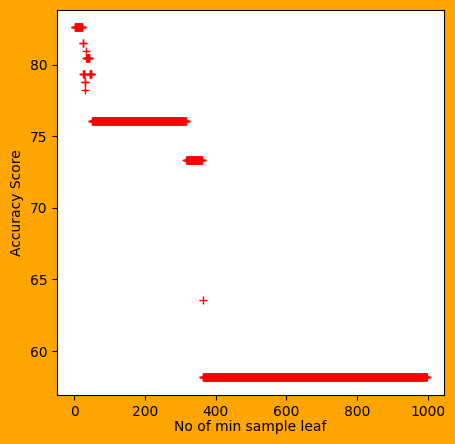

In [ ]:
#Tunning min sample leaf lets find out what happens
var3=[]
for i in range(3,1000):
  new_model2=DecisionTreeClassifier(max_depth=3,min_samples_split=3,min_samples_leaf=i)
  new_model2.fit(X1_train,y1_train)
  array333=new_model2.predict(X1_test)
  var3.append(accuracy_score(array333,y1_test)*100)
  print(i,'|',accuracy_score(array333,y1_test))

plt.figure(figsize=(5,5),facecolor='orange',edgecolor='blue')
plt.plot(range(1,len(var3)+1),var3,'r+')
plt.xlabel("No of min sample leaf",labelpad=1)
plt.ylabel("Accuracy Score")
plt.show()


2 | 0.5108695652173914
3 | 0.7119565217391305
4 | 0.7336956521739131
5 | 0.7336956521739131
6 | 0.7608695652173914
7 | 0.7717391304347826
8 | 0.7717391304347826
9 | 0.7717391304347826
10 | 0.7608695652173914
11 | 0.7608695652173914
12 | 0.7336956521739131
13 | 0.7336956521739131
14 | 0.7336956521739131
15 | 0.7336956521739131
16 | 0.7608695652173914
17 | 0.7608695652173914
18 | 0.7608695652173914
19 | 0.7608695652173914
20 | 0.7608695652173914
21 | 0.7608695652173914
22 | 0.7608695652173914
23 | 0.7608695652173914
24 | 0.7608695652173914
25 | 0.7608695652173914
26 | 0.7608695652173914
27 | 0.7608695652173914
28 | 0.7608695652173914
29 | 0.7608695652173914
30 | 0.7608695652173914
31 | 0.7608695652173914
32 | 0.7608695652173914
33 | 0.7608695652173914
34 | 0.7608695652173914
35 | 0.7608695652173914
36 | 0.7608695652173914
37 | 0.7608695652173914
38 | 0.7608695652173914
39 | 0.7608695652173914
40 | 0.7608695652173914
41 | 0.7608695652173914
42 | 0.7608695652173914
43 | 0.7608695652173914


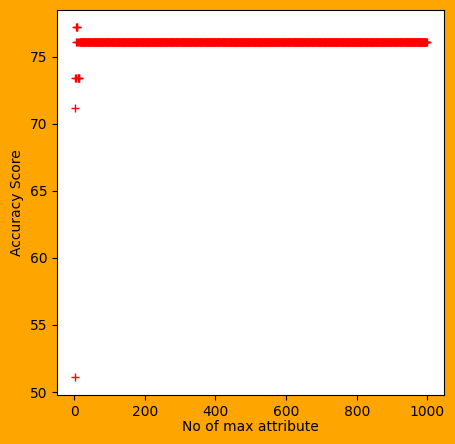

In [ ]:
var4=[]
for i in range(2,1000):
  new_model3=DecisionTreeClassifier(max_depth=3,min_samples_split=3,min_samples_leaf=200,max_features=i)
  new_model3.fit(X1_train,y1_train)
  array3333=new_model3.predict(X1_test)
  var4.append(accuracy_score(array3333,y1_test)*100)
  print(i,'|',accuracy_score(array3333,y1_test))

plt.figure(figsize=(5,5),facecolor='orange',edgecolor='blue')
plt.plot(range(1,len(var4)+1),var4,'r+')
plt.xlabel("No of max attribute",labelpad=1)
plt.ylabel("Accuracy Score")
plt.show()


0.7608695652173914


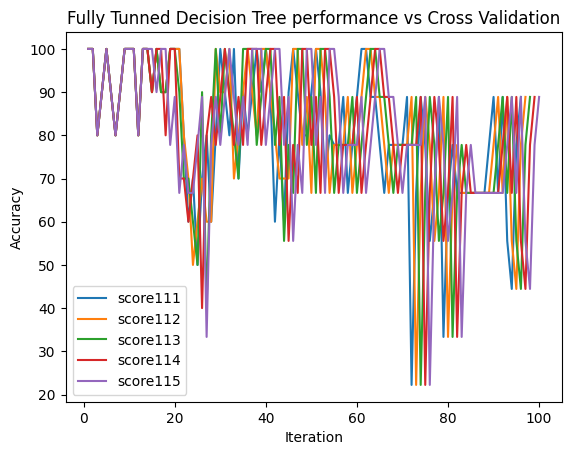

In [ ]:
#Lets check validation score for this tuned model
new_model5=DecisionTreeClassifier(max_depth=3,min_samples_split=3,min_samples_leaf=200,max_features=50)
new_model5.fit(X1_train,y1_train)
y_pred=new_model5.predict(X1_test)
print(accuracy_score(y_pred,y1_test))
score000=cross_val_score(new_model5,X1,y1,cv=5)
score001=cross_val_score(new_model5,X1,y1,cv=6)
score111=cross_val_score(new_model5,X1,y1,cv=96)
score112=cross_val_score(new_model5,X1,y1,cv=97)
score113=cross_val_score(new_model5,X1,y1,cv=98)
score114=cross_val_score(new_model5,X1,y1,cv=99)
score115=cross_val_score(new_model5,X1,y1,cv=100)

score00=score000*100
score001=score001*100
score111=score111*100
score112=score112*100
score113=score113*100
score114=score114*100
score115=score115*100
plt.figure()
plt.title("Fully Tunned Decision Tree performance vs Cross Validation")
plt.plot(range(1,97),score111)
plt.plot(range(1,98),score112)
plt.plot(range(1,99),score113)
plt.plot(range(1,100),score114)
plt.plot(range(1,101),score115)
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.legend(labels=['score111','score112','score113','score114','score115'])


The performance of the model at  5 iterations is given as  0.8135542884295557
The performance of the model at  6 iterations is given as  81.37254901960785
The performance of the model at  96 iterations is given as  81.04166666666664
The performance of the model at  97 iterations is given as  81.09965635738828
The performance of the model at  98 iterations is given as  81.1224489795918
The performance of the model at  99 iterations is given as  81.20089786756449
The performance of the model at  100 iterations is given as  81.11111111111107


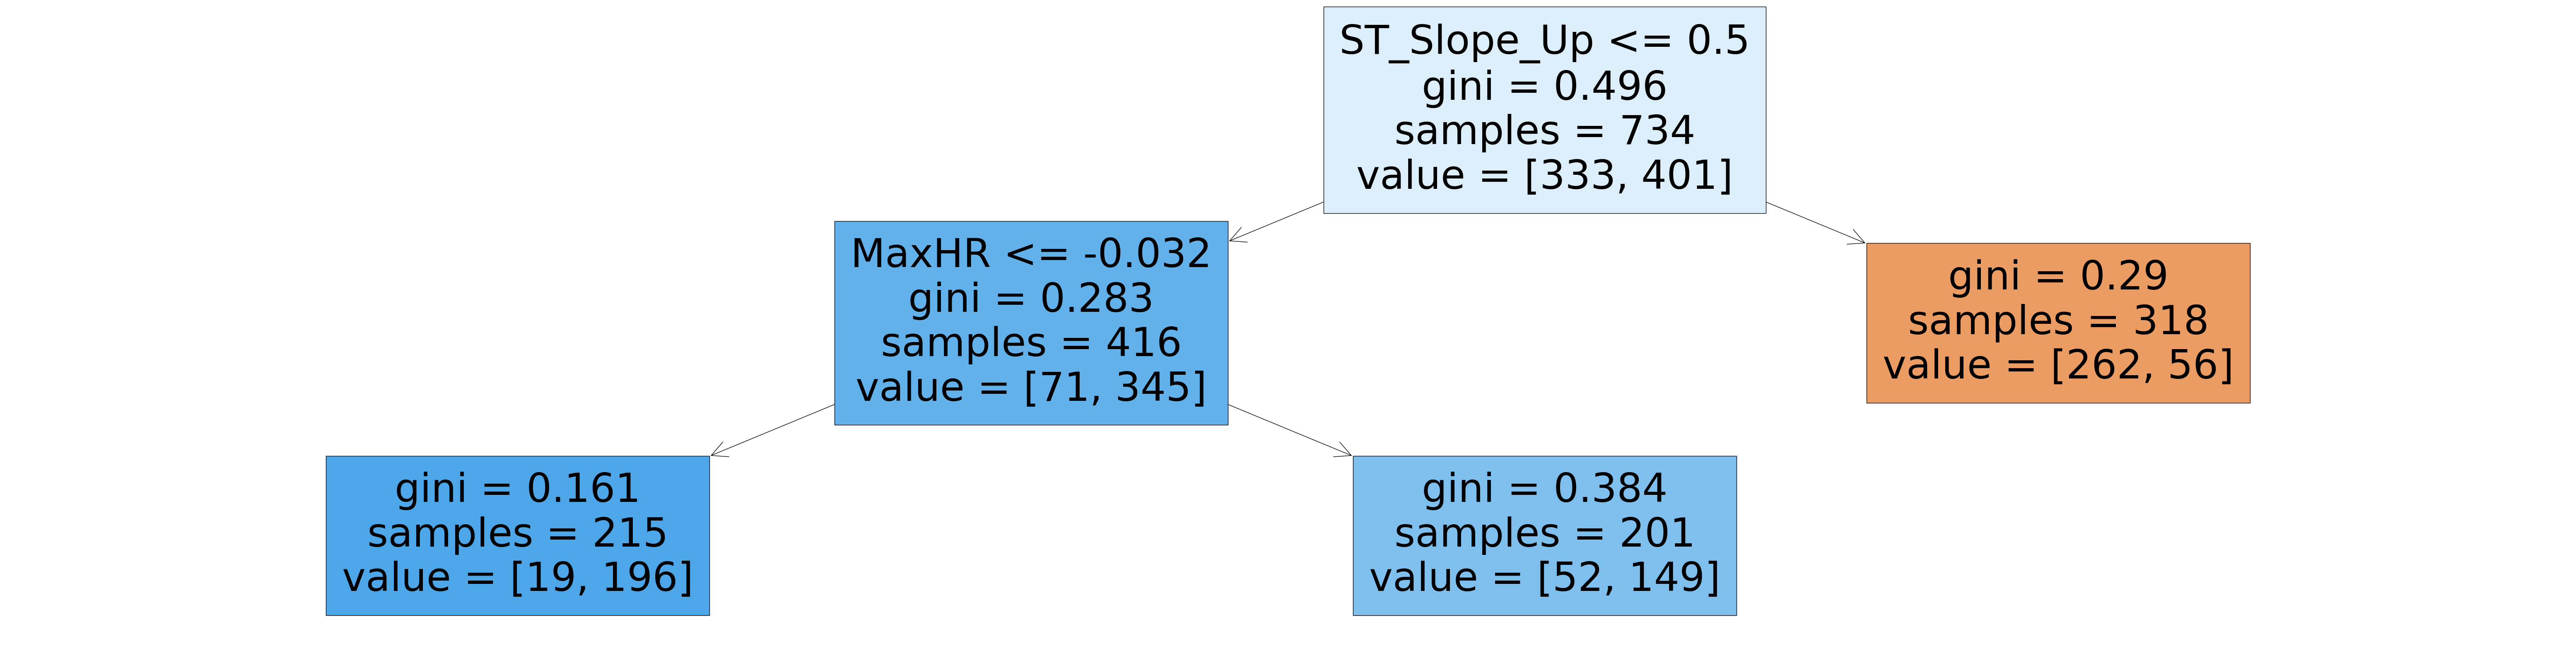

In [ ]:
cv_iterations22=[score000,score001,score111,score112,score113,score114,score115]
for item in cv_iterations22:
  print('The performance of the model at ',len(item),'iterations is given as ',mean(item))


plt.figure(figsize =(80,20))

plot_tree(new_model5, feature_names=X1_train.columns, filled=True);

  

 

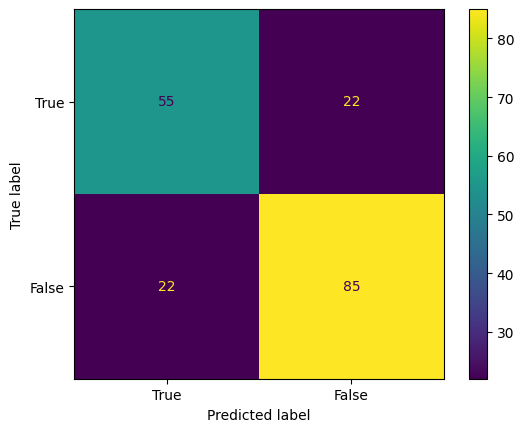

In [ ]:
full_tuned_model=confusion_matrix(y1_test,y_pred)
cm_display_3 = metrics.ConfusionMatrixDisplay(confusion_matrix =full_tuned_model, display_labels = [True, False])
cm_display_3.plot()
plt.show()


<h1>Let us start classifying using Naive Bayes Classifier </h1>
<h2><b>Naive Bayes Classifier</b></h2>
<p>It is a very old algorithm for finding conditional probabilites based on class conditional and prior probabilites<br>
 <b>P(A|B)=(P(B|A)*P(A))/P(B)</b>
 <br><div>In generalized Notion </div>
<b> P(A|Xᵢ)=P(Xᵢ|A)*P(A) </b>
<div> In actuality it can be written based on conditional probabilites rules but in scikit-learn there is a module for Naive Bayes classifier which can be applied and parameters in them can be tuned.</div>
 </p>


In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X1_train,y1_train)



GaussianNB()

In [ ]:
#Lets start predicting the values using our test set
array222=gnb.predict(X1_test)
accuracy_score(y1_test,array222)



0.8315217391304348

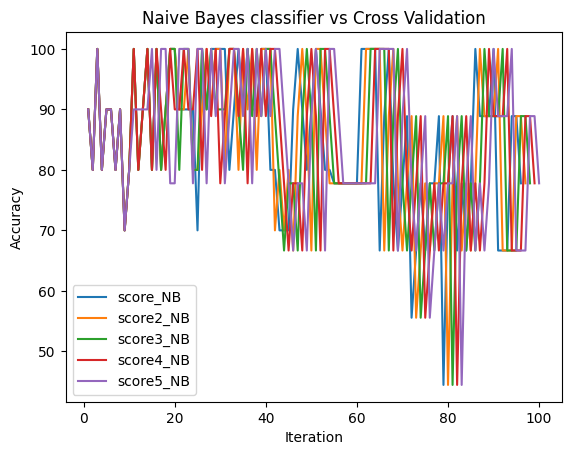

The performance of the model at  96 iterations is given as  85.06944444444439
The performance of the model at  97 iterations is given as  84.97136311569297
The performance of the model at  98 iterations is given as  84.98866213151922
The performance of the model at  99 iterations is given as  85.06172839506166
The performance of the model at  100 iterations is given as  85.12222222222213


In [ ]:

score_NB=cross_val_score(gnb,X1,y1,cv=96)
score2_NB=cross_val_score(gnb,X1,y1,cv=97)
score3_NB=cross_val_score(gnb,X1,y1,cv=98)
score4_NB=cross_val_score(gnb,X1,y1,cv=99)
score5_NB=cross_val_score(gnb,X1,y1,cv=100)
score_NB=score_NB*100
score2_NB=score2_NB*100
score3_NB=score3_NB*100
score4_NB=score4_NB*100
score5_NB=score5_NB*100
plt.figure()
plt.title("Naive Bayes classifier vs Cross Validation")
plt.plot(range(1,97),score_NB)
plt.plot(range(1,98),score2_NB)
plt.plot(range(1,99),score3_NB)
plt.plot(range(1,100),score4_NB)
plt.plot(range(1,101),score5_NB)
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.legend(labels=['score_NB','score2_NB','score3_NB','score4_NB','score5_NB'])
plt.show()

cv_iterations2_NB=[score_NB,score2_NB,score3_NB,score4_NB,score5_NB]
for item in cv_iterations2_NB:
  print('The performance of the model at ',len(item),'iterations is given as ',mean(item))


<h1><b> KNN</b> </h1>
<h2> KNN:K-Nearest Neighbour </h2>
<div> This algorithm also called as lazy algorithm, first we have given an instance to classify then we calculate the distance(there may be different distance metric) popularly Euclid distance metric is used. The distance between them is then arranged in ascending order and the points having minimum distance between themselves are taken. The value of K is chosen randomly(always odd) values are chosen such that there do not arise an equality condition in voting. Then the classification of K-Neighbours are taken as votes, then the resultant class is defined by the majority in the classification.</div>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#First trying with default tuned model after evaluation of this model we will tune  our model accordingly
neigh=KNeighborsClassifier()
neigh.fit(X1_train,y1_train)
neigh.fit(X_train,y1_train)


KNeighborsClassifier()

In [ ]:
array_neigh=neigh.predict(X1_test)
array_neigh1=neigh.predict(X_test)
array_neigh=np.array(array_neigh)
array_neigh11=array_neigh.reshape(-1,1)
array_neigh111=array_neigh1.reshape(-1,1)

y1_test=np.array(y1_test)
y1_test=y1_test.reshape(-1,1)







In [ ]:
knn_=confusion_matrix(y1_test,array_neigh1)
knn__=confusion_matrix(y_test,array_neigh11)

knn_,knn__

(array([[28, 49],
        [39, 68]]),
 array([[34, 40],
        [49, 61]]))

In [ ]:
accuracy_score(y1_test,array_neigh1),accuracy_score(y_test,array_neigh11)

(0.5217391304347826, 0.5163043478260869)

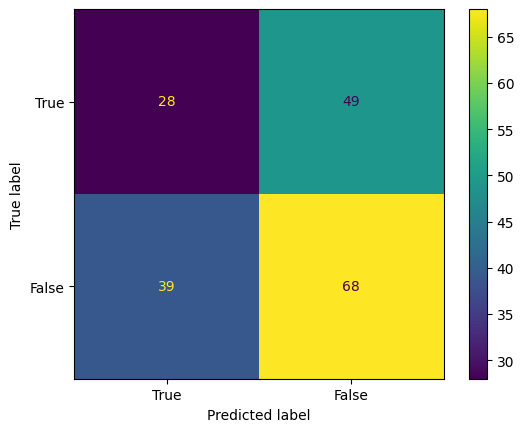

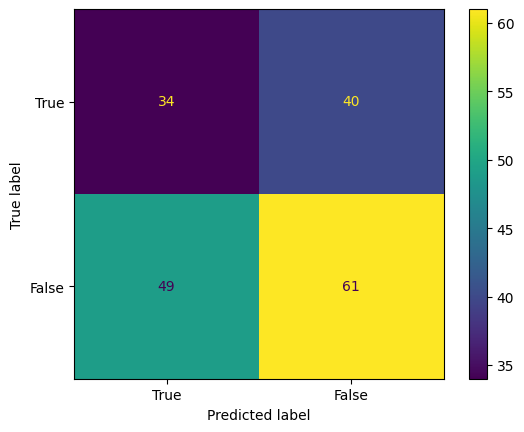

In [ ]:

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = knn_, display_labels = [True, False])
cm_display_2=metrics.ConfusionMatrixDisplay(confusion_matrix=knn__,display_labels=[True,False])
cm_display.plot()
cm_display_2.plot()
plt.show()


<h1>Some Observations could be directly drawn here </h1>
<ol><li>The KNN model of dataset without standard scaler are having less Type-1 error</li>
<li>The KNN model of dataset with standard scaler are having large Type-1 error</li>
<li> The model accuracy can also be drawn in the similar way</li>
</ol>


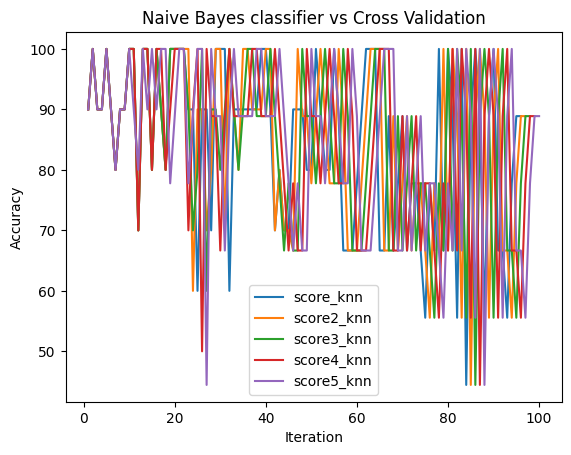

The performance of the model at  96 iterations is given as  84.50231481481481
The performance of the model at  97 iterations is given as  84.61626575028635
The performance of the model at  98 iterations is given as  84.41043083900223
The performance of the model at  99 iterations is given as  84.45566778900108
The performance of the model at  100 iterations is given as  84.58888888888883


In [ ]:
#Lets check by the cross validation score and its plot
score_knn=cross_val_score(neigh,X1,y1,cv=96)
score2_knn=cross_val_score(neigh,X1,y1,cv=97)
score3_knn=cross_val_score(neigh,X1,y1,cv=98)
score4_knn=cross_val_score(neigh,X1,y1,cv=99)
score5_knn=cross_val_score(neigh,X1,y1,cv=100)
score_knn=score_knn*100
score2_knn=score2_knn*100
score3_knn=score3_knn*100
score4_knn=score4_knn*100
score5_knn=score5_knn*100
plt.figure()
plt.title("Naive Bayes classifier vs Cross Validation")
plt.plot(range(1,97),score_knn)
plt.plot(range(1,98),score2_knn)
plt.plot(range(1,99),score3_knn)
plt.plot(range(1,100),score4_knn)
plt.plot(range(1,101),score5_knn)
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.legend(labels=['score_knn','score2_knn','score3_knn','score4_knn','score5_knn'])
plt.show()

cv_iterations2_knn=[score_knn,score2_knn,score3_knn,score4_knn,score5_knn]
for item in cv_iterations2_knn:
  print('The performance of the model at ',len(item),'iterations is given as ',mean(item))



<h1>Start Tuning Parameter in the KNN algorithm</h1>
<p> Parmeters in KNN algorithms are the followings:</br>
<ol><li>Total Number of neighbors to be taken.</li>
  <li>Distance metric: Usually the value of p is 2 but may be further tuned </li>
  <li>

In [ ]:
new_list=list(one_hot_encoded_data.columns)
print(len(new_list))
val_knn=[]
for i in range(3,len(X1_train)-1,2):
  knn_model=KNeighborsClassifier(n_neighbors=i)
  knn_model.fit(X1_train,y1_train)
  arr_knn=knn_model.predict(X1_test)
  acc_knn=accuracy_score(y1_test,arr_knn)
  val_knn.append(acc_knn)
  print(i,'|',acc_knn)




20
3 | 0.8315217391304348
5 | 0.8369565217391305
7 | 0.8206521739130435
9 | 0.7989130434782609
11 | 0.8097826086956522
13 | 0.8260869565217391
15 | 0.8260869565217391
17 | 0.8478260869565217
19 | 0.8369565217391305
21 | 0.8369565217391305
23 | 0.8369565217391305
25 | 0.8260869565217391
27 | 0.8206521739130435
29 | 0.8315217391304348
31 | 0.8260869565217391
33 | 0.8206521739130435
35 | 0.8260869565217391
37 | 0.8260869565217391
39 | 0.8260869565217391
41 | 0.8152173913043478
43 | 0.8206521739130435
45 | 0.8152173913043478
47 | 0.8206521739130435
49 | 0.8206521739130435
51 | 0.8260869565217391
53 | 0.8206521739130435
55 | 0.8152173913043478
57 | 0.8152173913043478
59 | 0.8097826086956522
61 | 0.8097826086956522
63 | 0.8152173913043478
65 | 0.8152173913043478
67 | 0.8206521739130435
69 | 0.8152173913043478
71 | 0.8206521739130435
73 | 0.8206521739130435
75 | 0.8206521739130435
77 | 0.8206521739130435
79 | 0.8152173913043478
81 | 0.8260869565217391
83 | 0.8260869565217391
85 | 0.8260869565

Text(0, 0.5, 'Model Accuracy')

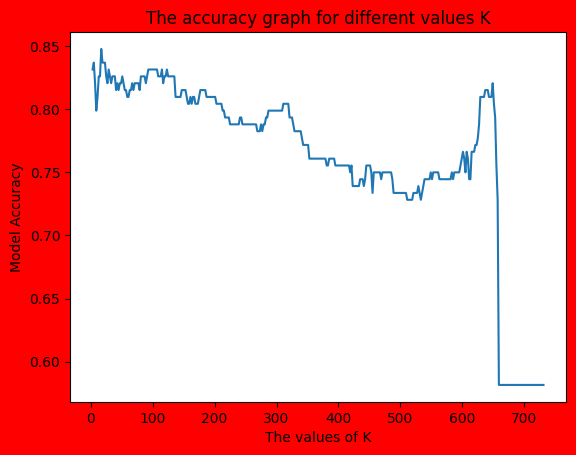

In [ ]:
plt.figure(facecolor='red')
plt.title("The accuracy graph for different values K")
plt.plot(range(3,len(X1_train)-1,2),val_knn)
plt.xlabel("The values of K")
plt.ylabel("Model Accuracy")



In [ ]:
val_knn1=[]
for i in range(1,len(new_list)-1):
  knn_model1=KNeighborsClassifier(n_neighbors=55,p=i)
  knn_model1.fit(X1_train,y1_train)
  arr_knn1=knn_model1.predict(X1_test)
  acc_knn1=accuracy_score(y1_test,arr_knn1)
  val_knn1.append(acc_knn1)
  print(i,'|',acc_knn1)

1 | 0.8152173913043478
2 | 0.8152173913043478
3 | 0.8152173913043478
4 | 0.8152173913043478
5 | 0.8152173913043478
6 | 0.8152173913043478
7 | 0.8152173913043478
8 | 0.8152173913043478
9 | 0.8152173913043478
10 | 0.8152173913043478
11 | 0.8152173913043478
12 | 0.8152173913043478
13 | 0.8152173913043478
14 | 0.8152173913043478
15 | 0.8152173913043478
16 | 0.8152173913043478
17 | 0.8152173913043478
18 | 0.8152173913043478


Text(0, 0.5, 'Model Accuracy')

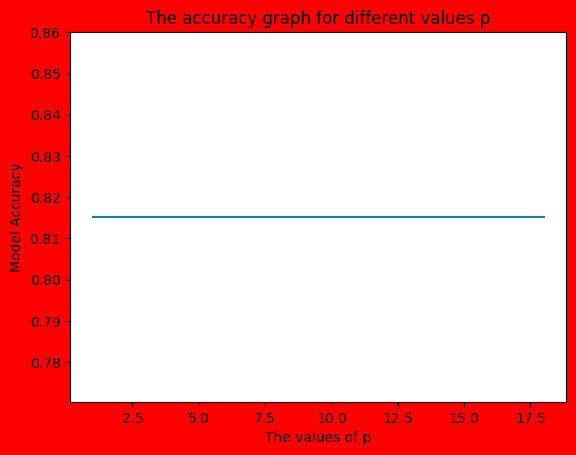

In [ ]:
plt.figure(facecolor='red')
plt.title("The accuracy graph for different values p")
plt.plot(range(1,len(new_list)-1),val_knn1)
plt.xlabel("The values of p")
plt.ylabel("Model Accuracy")

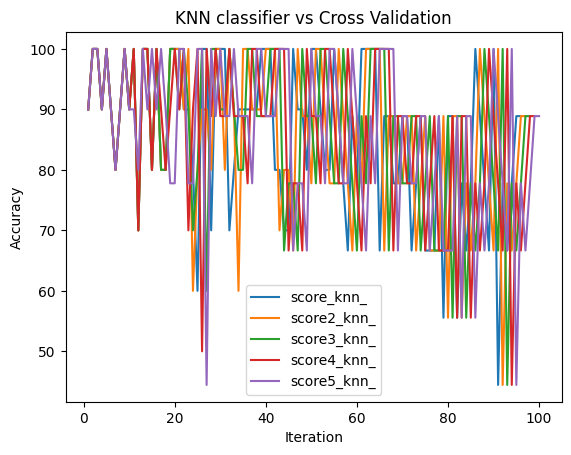

The performance of the model at  96 iterations is given as  85.71759259259255
The performance of the model at  97 iterations is given as  85.72737686139743
The performance of the model at  98 iterations is given as  85.75963718820856
The performance of the model at  99 iterations is given as  85.81369248035907
The performance of the model at  100 iterations is given as  85.81111111111105


In [ ]:
#From above notion it can be figured out that model is best for p-value of 2 i.e for euclidean distance
#Performing cross validation and its scores.
score_knn_=cross_val_score(knn_model1,X1,y1,cv=96)
score2_knn_=cross_val_score(knn_model1,X1,y1,cv=97)
score3_knn_=cross_val_score(knn_model1,X1,y1,cv=98)
score4_knn_=cross_val_score(knn_model1,X1,y1,cv=99)
score5_knn_=cross_val_score(knn_model1,X1,y1,cv=100)
score_knn_=score_knn_*100
score2_knn_=score2_knn_*100
score3_knn_=score3_knn_*100
score4_knn_=score4_knn_*100
score5_knn_=score5_knn_*100
plt.figure()
plt.title("KNN classifier vs Cross Validation")
plt.plot(range(1,97),score_knn_)
plt.plot(range(1,98),score2_knn_)
plt.plot(range(1,99),score3_knn_)
plt.plot(range(1,100),score4_knn_)
plt.plot(range(1,101),score5_knn_)
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.legend(labels=['score_knn_','score2_knn_','score3_knn_','score4_knn_','score5_knn_'])
plt.show()

cv_iterations2_knn_=[score_knn_,score2_knn_,score3_knn_,score4_knn_,score5_knn_]
for item in cv_iterations2_knn_:
  print('The performance of the model at ',len(item),'iterations is given as ',mean(item))

<h1><b>Support Vector Machine</b></h1>
<p> Support Vector Machine is an algorithm which may be used as a classfier as well as regressor </p>
<div><p>Support Vector Machine uses decision boundary to predict the class of the data point.</p></div>
<div>There are terms called as supporting hyperplane and support vectors the algorithm try to maximize the distance between the serparting hyperplane</div>



In [ ]:
!pip install tensorflow
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers


model=keras.Sequential([
    keras.layers.Dense(32,input_shape=(19,),activation='relu'),
    keras.layers.Dense(16,activation='relu'),
    keras.layers.Dense(2,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(X1_train,y1_train,epochs=100,batch_size=8)


Epoch 1/100
92/92 [==============================] - 1s 2ms/step - loss: 0.5412 - accuracy: 0.7520
Epoch 2/100
92/92 [==============================] - 0s 2ms/step - loss: 0.3739 - accuracy: 0.8733
Epoch 3/100
92/92 [==============================] - 0s 2ms/step - loss: 0.3343 - accuracy: 0.8665
Epoch 4/100
92/92 [==============================] - 0s 2ms/step - loss: 0.3201 - accuracy: 0.8801
Epoch 5/100
92/92 [==============================] - 0s 2ms/step - loss: 0.3165 - accuracy: 0.8760
Epoch 6/100
92/92 [==============================] - 0s 2ms/step - loss: 0.3097 - accuracy: 0.8774
Epoch 7/100
92/92 [==============================] - 0s 2ms/step - loss: 0.3046 - accuracy: 0.8787
Epoch 8/100
92/92 [==============================] - 0s 2ms/step - loss: 0.3001 - accuracy: 0.8815
Epoch 9/100
92/92 [==============================] - 0s 2ms/step - loss: 0.2994 - accuracy: 0.8842
Epoch 10/100
92/92 [==============================] - 0s 2ms/step - loss: 0.2968 - accuracy: 0.8815
Epoch 11/

In [ ]:
model.evaluate(X1_test,y1_test,batch_size=10)

19/19 [==============================] - 0s 2ms/step - loss: 0.6159 - accuracy: 0.8315


[0.6159014701843262, 0.83152174949646]

6/6 [==============================] - 0s 2ms/step


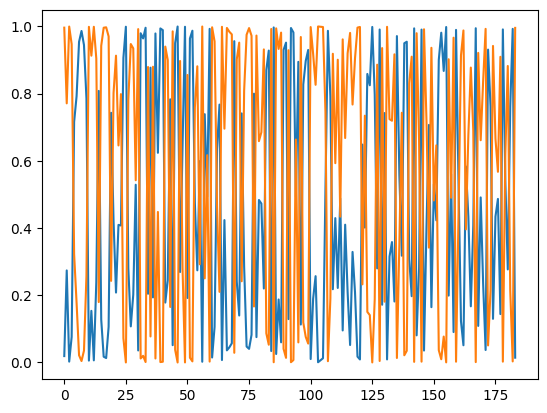

In [ ]:
model.predict(X1_test)


plt.plot(model.predict(X1_test))



In [ ]:
model2_tf=keras.Sequential([
    keras.layers.Dense(32,input_shape=(19,),activation='relu'),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(2,activation='sigmoid')
])

model2_tf.compile(optimizer='adam',
                  loss=keras.losses.SparseCategoricalCrossentropy(),
                  metrics=['accuracy']
)



In [ ]:
model2_tf.fit(X1_train,y1_train,epochs=100,batch_size=8)


Epoch 1/100
92/92 [==============================] - 2s 4ms/step - loss: 0.5024 - accuracy: 0.7657
Epoch 2/100
92/92 [==============================] - 0s 4ms/step - loss: 0.3517 - accuracy: 0.8624
Epoch 3/100
92/92 [==============================] - 0s 4ms/step - loss: 0.3233 - accuracy: 0.8706
Epoch 4/100
92/92 [==============================] - 0s 4ms/step - loss: 0.3120 - accuracy: 0.8787
Epoch 5/100
92/92 [==============================] - 0s 4ms/step - loss: 0.3048 - accuracy: 0.8747
Epoch 6/100
92/92 [==============================] - 0s 3ms/step - loss: 0.2987 - accuracy: 0.8856
Epoch 7/100
92/92 [==============================] - 0s 2ms/step - loss: 0.2890 - accuracy: 0.8951
Epoch 8/100
92/92 [==============================] - 0s 3ms/step - loss: 0.2823 - accuracy: 0.8856
Epoch 9/100
92/92 [==============================] - 0s 3ms/step - loss: 0.2732 - accuracy: 0.8869
Epoch 10/100
92/92 [==============================] - 0s 2ms/step - loss: 0.2693 - accuracy: 0.9019
Epoch 11/

NameError: ignored

<h1> Extreme Gradient Boosting Algorithm (XGB)</h1>
<p> It uses parallel computations for reducing the time for the calculation and in terms of reducing error it learn by weak learners such that the error terms are taken upto 2 terms in Taylor series expansion. </p>
<div> XGB: It can be implemented by a separate library called XGB which is available in python.</div>

<h1 style='bold'>Hypothesis Testing </h1></br>
<div>Hypothesis testing is type of statistical analysis in which you put assumptions about population parameter to the test. It is used to estimate the realtionship between two variables.</br>
e.g - i)A drug company has launched a drug and did a survey about efficacy of the drug and believed that the drug is effective 90% of the time.</br>
     ii) In a coursework, daily attendance, doing homeworks and studying daily has impact in final results.</div>

<h2 style='bold'> How these questions were answered ? </h2>
<p><ul><li> A population is taken at first</li></ul>
       <li> We must given level of significance for which we have to test </li>
       <li> We define our hypothesis</n><br>
             <ul><li>Null Hypothesis</li>
                 <li> Alternative Hypotheis</li></ul>
       <li> Certain tests are used for accepting or rejecting the hypothesis </li>
       <div> Some examples of the tests are </div>
             <ul><li>Chi-square Test </li>
             <li> Z-Test </li>
             <li> T-test </li>
             </ul>


<p style='bold'> Let's understand this by an example: </p>
<div> A random sample of 50 items given the mean 6.2 and variance 10.24. Can it be regarded as drawn from a normal distribution with mean 5.4 at 5% level of significance ?
<p> n=50; ̄x=6.2; σ=10.24 </p>
<ol><li><p> Defining Null Hypothesis first </p>
        <div> Null Hypothesis Hₒ: μ=5.4 </br>
              Alternate Hypotheis Hₐ: μ≠5.4 </br>
        </div>
      </li>
<li> Test Statistic:
        z=|̄(x-μ)/σ/(n^1/2)|
        z=1.77

</li>
<li> Level of significance α:
     α=5%=0.05
</li>

<li> Critical Value:
  α=0.05 
  Z=1.96
</li>
<li> In test statistic we obtained value 
 Z=1.96
 1.77 ⪅ 1.96
 </li>
 <p> So the Null Hypothesis is accepted </p>
 



    
  
             
             








